In [216]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

In [217]:
data=pd.read_csv("dataset.csv")
data

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,89489,3,1,13,379,2017-11-06 15:13:23,NaN,0
1,204158,35,1,13,21,2017-11-06 15:41:07,2017-11-07 08:17:19,1
2,3437,6,1,13,459,2017-11-06 15:42:32,NaN,0
3,167543,3,1,13,379,2017-11-06 15:56:17,NaN,0
4,147509,3,1,13,379,2017-11-06 15:57:01,NaN,0
...,...,...,...,...,...,...,...,...
2300556,32457,2,1,19,477,2017-11-09 15:59:59,NaN,0
2300557,20266,14,1,13,446,2017-11-09 15:59:59,NaN,0
2300558,49383,12,2,17,178,2017-11-09 16:00:00,NaN,0
2300559,34894,12,1,15,145,2017-11-09 16:00:00,NaN,0


In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300561 entries, 0 to 2300560
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   ip               int64 
 1   app              int64 
 2   device           int64 
 3   os               int64 
 4   channel          int64 
 5   click_time       object
 6   attributed_time  object
 7   is_attributed    int64 
dtypes: int64(6), object(2)
memory usage: 140.4+ MB


In [219]:
data["click_time"] = pd.to_datetime(data["click_time"])

In [220]:
data = data.drop(columns= ["attributed_time"])
data = data.drop(columns= ["click_time"])
data


,ip,app,device,os,channel,is_attributed
0,89489,3,1,13,379,0
1,204158,35,1,13,21,1
2,3437,6,1,13,459,0
3,167543,3,1,13,379,0
4,147509,3,1,13,379,0
...,...,...,...,...,...,...
2300556,32457,2,1,19,477,0
2300557,20266,14,1,13,446,0
2300558,49383,12,2,17,178,0
2300559,34894,12,1,15,145,0


In [221]:
data.isna().sum()

ip               0
app              0
device           0
os               0
channel          0
is_attributed    0
dtype: int64

In [222]:
data = data.sample(n = 10000)

In [223]:
from sklearn.model_selection import train_test_split

In [224]:
x=data.iloc[:,0:6]
y=data.iloc[:,-1]

In [225]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=4)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.20,random_state=4)

In [226]:
x_train

,ip,app,device,os,channel,is_attributed
796716,235700,14,1,19,401,0
898114,221442,116,1,28,101,1
2193032,107155,15,1,17,245,0
2072853,323190,18,1,12,449,0
1390668,73124,9,1,16,466,1
...,...,...,...,...,...,...
1132972,59508,5,1,13,377,0
1217592,239235,3,1,19,205,0
988566,75634,2,1,27,205,0
1218612,143638,11,1,6,325,0


In [227]:
def resamplingDataPrep(X_train, y_train, target_var): 
    # concatenate our training data back together
    resampling = X_train.copy()
    resampling[target_var] = y_train.values
    # separate minority and majority classes
    majority_class = resampling[resampling[target_var]==0]
    minority_class = resampling[resampling[target_var]==1]
    # Get a class count to understand the class imbalance.
    print('majority_class: '+ str(len(majority_class)))
    print('minority_class: '+ str(len(minority_class)))
    return majority_class, minority_class

In [228]:
def upsample_SMOTE(X_train, y_train, ratio=1.0):
    """Upsamples minority class using SMOTE.
    Ratio argument is the percentage of the upsampled minority class in relation
    to the majority class. Default is 1.0
    """
    sm = SMOTE(random_state=23, sampling_strategy=ratio)
    X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
    print(len(X_train_sm), len(y_train_sm))
    return X_train_sm, y_train_sm

In [229]:
resamplingDataPrep(x_train, y_train, "is_attributed")

majority_class: 6396
minority_class: 1604


(             ip  app  device  os  channel  is_attributed
 796716   235700   14       1  19      401              0
 2193032  107155   15       1  17      245              0
 2072853  323190   18       1  12      449              0
 532721   167569    3       1  15      205              0
 1181949  131812    3       1  19      280              0
 ...         ...  ...     ...  ..      ...            ...
 1132972   59508    5       1  13      377              0
 1217592  239235    3       1  19      205              0
 988566    75634    2       1  27      205              0
 1218612  143638   11       1   6      325              0
 699505    36213    3       1  41      137              0
 
 [6396 rows x 6 columns],
              ip  app  device  os  channel  is_attributed
 898114   221442  116       1  28      101              1
 1390668   73124    9       1  16      466              1
 1849906  198944    9       1  22      244              1
 1125448    4486    9       1  22      244  

In [230]:
import imblearn as imblearn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE 

X_train_sm, y_train_sm = upsample_SMOTE(x_train, y_train, ratio=1.0)
print(X_train_sm, y_train_sm )

12792 12792
           ip  app  device  os  channel  is_attributed
0      235700   14       1  19      401              0
1      221442  116       1  28      101              1
2      107155   15       1  17      245              0
3      323190   18       1  12      449              0
4       73124    9       1  16      466              1
...       ...  ...     ...  ..      ...            ...
12787  190758   15       0  20      185              1
12788  201465   19       0  46      213              1
12789  345058   18       0  22      278              1
12790   49538   29       1  13      219              1
12791  320111   54       1  24      280              1

[12792 rows x 6 columns] 0        0
1        1
2        0
3        0
4        1
        ..
12787    1
12788    1
12789    1
12790    1
12791    1
Name: is_attributed, Length: 12792, dtype: int64


In [232]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#feature selection

# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# define feature selection
fs = SelectKBest(score_func=f_regression, k=2)
# apply feature selection
X_train_sm = fs.fit_transform(X_train_sm, y_train_sm)

In [234]:
scaler = MinMaxScaler()
scaler.fit(X_train_sm)

MinMaxScaler()

In [235]:
y_test.shape

(2000,)

In [236]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(random_state=0, max_iter=1000).fit(X_train_sm, y_train_sm)
y_predicted= clf1.predict(x_test)

In [237]:
#Accuracy = TP+TN/TP+FP+FN+TN
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)


0.7235

In [238]:
#the count of true negatives is C00, false negatives isC10 , true positives is C11 and false positives is C01 .
confusion_matrix(y_test, y_predicted)

array([[1158,  450],
       [ 103,  289]])

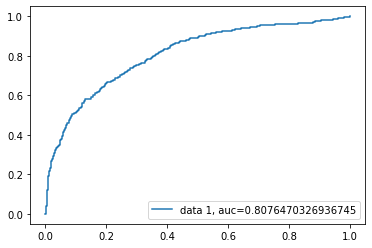

In [239]:
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred_proba = clf1.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [240]:
#SVM
from sklearn import svm
clf2 = svm.SVC( probability=True)
clf2.fit(X_train_sm, y_train_sm)
y_predicted = clf2.predict(x_test)

In [241]:
accuracy_score(y_test, y_predicted)

0.766

In [242]:
#the count of true negatives is C00, false negatives isC10 , true positives is C11 and false positives is C01 .
confusion_matrix(y_test, y_predicted)

array([[1322,  286],
       [ 182,  210]])

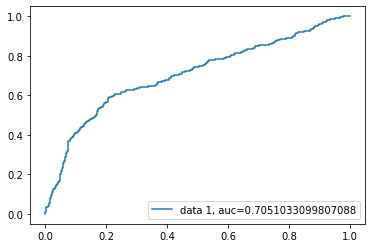

In [243]:
y_pred_proba = clf2.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [244]:
#kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train_sm)
y_predicted = kmeans.predict(x_test)

In [245]:
kmeans.score(x_test)

-4284983968348.8496

In [246]:
accuracy_score(y_test, y_predicted)

0.7715

In [247]:
#the count of true negatives is C00, false negatives isC10 , true positives is C11 and false positives is C01 .
confusion_matrix(y_test, y_predicted)

array([[1350,  258],
       [ 199,  193]])

In [248]:
#decisionTree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf3 = DecisionTreeClassifier(random_state=0)
cross_val_score(clf3, X_train_sm, y_train_sm, cv=10)
clf3.fit(X_train_sm, y_train_sm)
y_predicted = clf3.predict(x_test)

In [249]:
accuracy_score(y_test, y_predicted)

1.0

In [250]:
#the count of true negatives is C00, false negatives isC10 , true positives is C11 and false positives is C01 .
confusion_matrix(y_test, y_predicted)

array([[1608,    0],
       [   0,  392]])

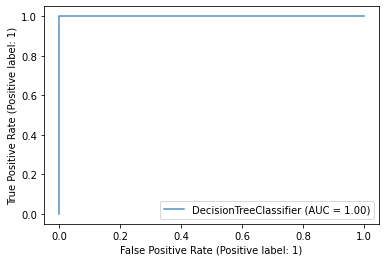

In [251]:
#roc plot
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(clf3, x_test, y_test, ax=ax, alpha=0.8)
# svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [252]:
#random forst
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf4 = RandomForestClassifier()
clf4.fit(X_train_sm, y_train_sm)
y_predicted = clf4.predict(x_test)
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [253]:
accuracy_score(y_test, y_predicted)

1.0

In [254]:
#the count of true negatives is C00, false negatives isC10 , true positives is C11 and false positives is C01 .
confusion_matrix(y_test, y_predicted)

array([[1608,    0],
       [   0,  392]])

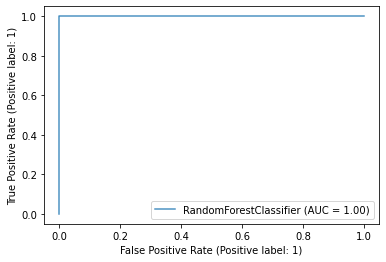

In [255]:
#roc plot
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(clf4, x_test, y_test, ax=ax, alpha=0.8)
# svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [256]:
#naive bayes
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
# y_predicted = gnb.fit(X_train_sm, X_train_sm).predict(x_test)
# print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_predicted ).sum()))
Ar_R = BNB.fit(X_train_sm, y_train_sm).predict_proba(x_test)  # Can be combined to a single line.





df_R = pd.DataFrame(Ar_R)
df_R.columns = BNB.classes_
# Columns are class labels and Rows are observations.
# Each entry is a probability of that observation being assigned to that class label.
print(df_R)

predicted_labels = df_R.idxmax(axis=1).values  # For each row, take the column with the highest prob in that row.
print(predicted_labels)  

print(accuracy_score(y_test, predicted_labels))  # Percent accuracy of prediction.
  

             0         1
0     0.999898  0.000102
1     0.999898  0.000102
2     0.999898  0.000102
3     0.999898  0.000102
4     0.000240  0.999760
...        ...       ...
1995  0.000240  0.999760
1996  0.000002  0.999998
1997  0.999898  0.000102
1998  0.999898  0.000102
1999  0.999898  0.000102

[2000 rows x 2 columns]
[0 0 0 ... 0 0 0]
0.9995


In [257]:
#the count of true negatives is C00, false negatives isC10 , true positives is C11 and false positives is C01 .
confusion_matrix(y_test,predicted_labels)

array([[1607,    1],
       [   0,  392]])

In [258]:
BNB.score(x_test, y_test)

0.9995

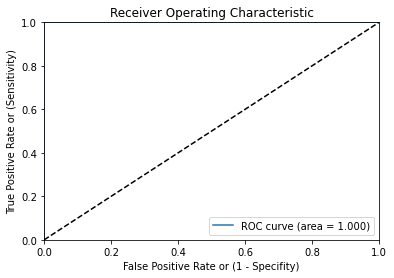

In [259]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
Y_BNB_score = BNB.predict_proba(x_test)
fpr_bnb, tpr_bnb, thresholds_bnb = roc_curve(y_test, Y_BNB_score[:, 1])
# metrics.plot_roc_curve(BNB, x_test, y_test) 
# plt.show(roc_curve)
roc_auc = auc(fpr_bnb, tpr_bnb)

# Plot ROC curve
plt.plot(fpr_bnb, tpr_bnb, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

Without upsampling

In [260]:
x_train2, x_test2, y_train2, y_test2 

(             ip  app  device  os  channel  is_attributed
 796716   235700   14       1  19      401              0
 898114   221442  116       1  28      101              1
 2193032  107155   15       1  17      245              0
 2072853  323190   18       1  12      449              0
 1390668   73124    9       1  16      466              1
 ...         ...  ...     ...  ..      ...            ...
 1132972   59508    5       1  13      377              0
 1217592  239235    3       1  19      205              0
 988566    75634    2       1  27      205              0
 1218612  143638   11       1   6      325              0
 699505    36213    3       1  41      137              0
 
 [8000 rows x 6 columns],
              ip  app  device  os  channel  is_attributed
 1316151  125141   27       1  13      122              0
 1904271   20576    2       1  17      477              0
 1042624   12091    2       1  18      237              0
 1593510   80447   15       1  18      140  

In [261]:
#naive bayes
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
# y_predicted = gnb.fit(X_train_sm, X_train_sm).predict(x_test)
# print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_predicted ).sum()))
Ar_R = BNB.fit(x_train2, y_train2).predict_proba(x_test2)  # Can be combined to a single line.





df_R = pd.DataFrame(Ar_R)
df_R.columns = BNB.classes_
# Columns are class labels and Rows are observations.
# Each entry is a probability of that observation being assigned to that class label.
print(df_R)

predicted_labels = df_R.idxmax(axis=1).values  # For each row, take the column with the highest prob in that row.
print(predicted_labels)  

print(accuracy_score(y_test2, predicted_labels))  # Percent accuracy of prediction.
  

             0         1
0     0.999891  0.000109
1     0.999891  0.000109
2     0.999891  0.000109
3     0.999891  0.000109
4     0.000892  0.999108
...        ...       ...
1995  0.000892  0.999108
1996  0.000014  0.999986
1997  0.999891  0.000109
1998  0.999891  0.000109
1999  0.999891  0.000109

[2000 rows x 2 columns]
[0 0 0 ... 0 0 0]
0.9995


In [262]:
#the count of true negatives is C00, false negatives isC10 , true positives is C11 and false positives is C01 .
confusion_matrix(y_test2,predicted_labels)

array([[1607,    1],
       [   0,  392]])

In [263]:
BNB.score(x_test2, y_test2)

0.9995

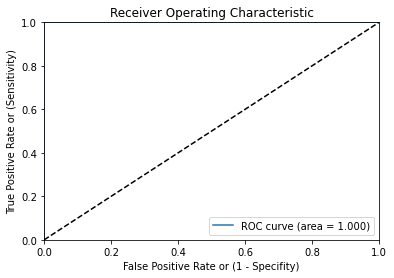

In [264]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
Y_BNB_score = BNB.predict_proba(x_test2)
fpr_bnb, tpr_bnb, thresholds_bnb = roc_curve(y_test2, Y_BNB_score[:, 1])
# metrics.plot_roc_curve(BNB, x_test, y_test) 
# plt.show(roc_curve)
roc_auc = auc(fpr_bnb, tpr_bnb)

# Plot ROC curve
plt.plot(fpr_bnb, tpr_bnb, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")